# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
Dataset: Telco Customer Churn  
Sumber: Kaggle – IBM Sample Dataset  

Tujuan:
Memprediksi apakah pelanggan akan churn (berhenti berlangganan) berdasarkan
informasi layanan, akun, dan demografi pelanggan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "blastchar/telco-customer-churn",
    "WA_Fn-UseC_-Telco-Customer-Churn.csv"
)

df.head()

/tmp/ipython-input-888028743.py:4: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.to_csv("Telco Customer Churn_raw.csv", index=False)

In [4]:
df = df.drop("customerID", axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


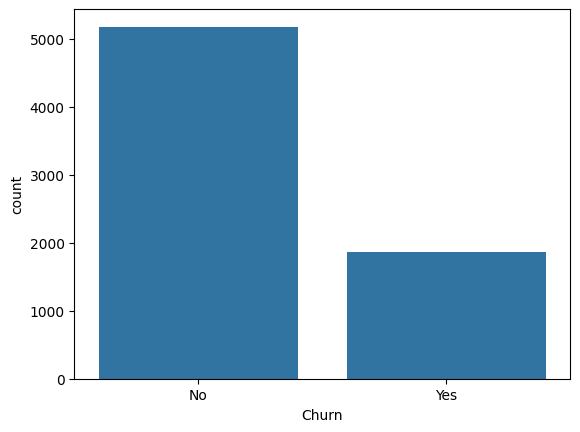

In [8]:
sns.countplot(x='Churn', data=df)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

# Missing Values

In [9]:
# Cek jumlah missing values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [10]:
# Konversi TotalCharges ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Hapus baris dengan missing values
df = df.dropna()
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# Menghapus Data Duplikat

In [11]:
# Cek jumlah data sebelum penghapusan duplikat
df.shape

(7032, 20)

In [12]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Cek ulang dataset
df.shape

(7010, 20)

# Encoding Data Kategorikal

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Normalisasi / Standarisasi Fitur Numerik

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.010000e+03,7.010000e+03,7.010000e+03
mean,-1.125110e-16,-5.676233e-17,-4.003771e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.285566e+00,-1.551384e+00,-1.002159e+00
25%,-9.592844e-01,-9.692656e-01,-8.303149e-01
50%,-1.435802e-01,1.833284e-01,-3.910947e-01
75%,9.576204e-01,8.319744e-01,6.694805e-01
max,1.610184e+00,1.791638e+00,2.821089e+00


# Deteksi dan Penanganan Outlier

In [15]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (
    (df[numerical_cols] < (Q1 - 1.5 * IQR)) |
    (df[numerical_cols] > (Q3 + 1.5 * IQR))
)

outlier_condition.sum()

,0
tenure,0
MonthlyCharges,0
TotalCharges,0


In [16]:
for col in numerical_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]

    df[col] = df[col].clip(lower_bound, upper_bound)

# Binning (Pengelompokan Data)

In [17]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=3,
    labels=['Short', 'Medium', 'Long']
)

# Encoding hasil binning
df['tenure_group'] = label_encoder.fit_transform(df['tenure_group'])
df[['tenure', 'tenure_group']].head()

,tenure,tenure_group
0,-1.285566,2
1,0.060346,1
2,-1.244781,2
3,0.508983,1
4,-1.244781,2


# Cek Dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int64  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int64  
 3   Dependents        7010 non-null   int64  
 4   tenure            7010 non-null   float64
 5   PhoneService      7010 non-null   int64  
 6   MultipleLines     7010 non-null   int64  
 7   InternetService   7010 non-null   int64  
 8   OnlineSecurity    7010 non-null   int64  
 9   OnlineBackup      7010 non-null   int64  
 10  DeviceProtection  7010 non-null   int64  
 11  TechSupport       7010 non-null   int64  
 12  StreamingTV       7010 non-null   int64  
 13  StreamingMovies   7010 non-null   int64  
 14  Contract          7010 non-null   int64  
 15  PaperlessBilling  7010 non-null   int64  
 16  PaymentMethod     7010 non-null   int64  
 17  

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,-1.285566,0,1,0,0,2,...,0,0,0,0,1,2,-1.165523,-0.997284,0,2
1,1,0,0,0,0.060346,1,0,0,2,0,...,0,0,0,1,0,3,-0.264071,-0.176848,0,1
2,1,0,0,0,-1.244781,1,0,0,2,2,...,0,0,0,0,1,3,-0.367189,-0.962740,1,2
3,1,0,0,0,0.508983,0,1,0,2,0,...,2,0,0,1,0,0,-0.751387,-0.198355,0,1
4,0,0,0,0,-1.244781,1,0,1,0,0,...,0,0,0,0,1,2,0.193308,-0.943549,1,2


# Menyimpan Dataset Hasil Preprocessing

In [20]:
df.to_csv("Telco Customer Churn_preprocessing.csv", index=False)